In [ ]:
# Import Libraries
import os
import gc
import shutil
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings("ignore")

import xml.etree.ElementTree as xet

In [ ]:
!git clone https://github.com/ultralytics/ultralytics
!pip install ultralytics
!pip install -U ray[tune]

Cloning into 'ultralytics'...
remote: Enumerating objects: 45289, done.
remote: Counting objects: 100% (1023/1023), done.
remote: Compressing objects: 100% (712/712), done.
remote: Total 45289 (delta 692), reused 530 (delta 310), pack-reused 44266 (from 1)
Receiving objects: 100% (45289/45289), 38.66 MiB | 25.79 MiB/s, done.
Resolving deltas: 100% (33573/33573), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 10.3 MB/s eta 0:00:00


In [ ]:
# # Get Bounding Box Predictions
from ultralytics import YOLO

path = "/content/image.jpg"

yolo_model = YOLO('/content/new_best_2nd_dec.pt')
bbox_results = yolo_model.predict(path, verbose=False)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
all_box_list = []
all_conf_list = []


for bbox_result in bbox_results:
    boxes = bbox_result.boxes
    box_list = []
    conf_list = []
    for box in boxes:
        box_data = box.data[0][:4]
        box_data = [int(x) for x in box_data]
        conf = round(float(box.conf), 2)
        if(conf>=0.5):
            box_list.append(box_data)
            conf_list.append(conf)

    all_box_list.append(box_list)
    all_conf_list.append(conf_list)

In [ ]:
all_conf_list


[[0.9, 0.65]]

In [ ]:
# for i in bbox_results:
#   print(i.boxes)

print(all_box_list[0])
print(all_conf_list)


# for i, box in enumerate(boxes):
#   print(i, box)

[[121, 429, 213, 452], [762, 408, 844, 425]]
[[0.9, 0.65]]


In [ ]:
ori_path = path
print(ori_path)
ori_image = cv2.imread(ori_path)
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

/content/image.jpg


In [ ]:
from ultralytics.utils.plotting import Annotator


annotator = Annotator(ori_image)
boxes = all_box_list
confs = all_conf_list

In [ ]:
for i in all_box_list[0]:
  print(i)

[121, 429, 213, 452]
[762, 408, 844, 425]


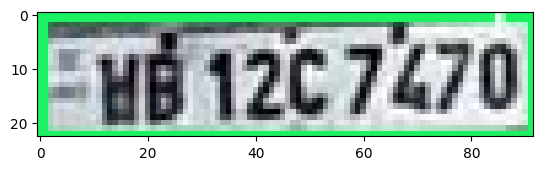

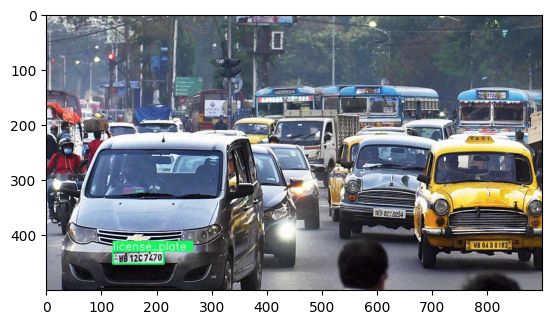

In [ ]:
import matplotlib.pyplot as plt

# for i, box in enumerate(boxes):
#   print(i)
box = all_box_list[0][0]
confs = 0.120
annotator.box_label(box=box, label="license_plate ", color=(30, 240, 100))

# Get Plate Object
x1, y1, x2, y2 = box
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
roi = ori_image[y1:y2, x1:x2]
plt.imshow(roi)
plt.show()

# Show Image
frame = annotator.result()
plt.imshow(frame)
plt.show()

In [ ]:
!file /content/images-20241202T162757Z-001.zip


/content/images-20241202T162757Z-001.zip: Zip archive data, at least v2.0 to extract, compression method=deflate


In [ ]:
!unzip -t /content/images-20241202T162757Z-001.zip


Archive:  /content/images-20241202T162757Z-001.zip
    testing: images/val/AP2.jpg       OK
    testing: images/val/AR7.jpg       OK
    testing: images/val/AS9.jpg       OK
    testing: images/val/AS26.jpg      OK
    testing: images/val/AP33.jpg      OK
    testing: images/val/AN7.jpg       OK
    testing: images/val/AP29.jpg      OK
    testing: images/val/AR12.jpg      OK
    testing: images/val/AR11.jpg      OK
    testing: images/val/AP43.jpg      OK
    testing: images/val/AN4.jpg       OK
    testing: images/val/AR3.jpg       OK
    testing: images/val/AP12.jpg      OK
    testing: images/val/AP3.jpg       OK
    testing: images/val/AS22.jpg      OK
    testing: images/val/AP26.jpg      OK
    testing: images/val/AP30.jpg      OK
    testing: images/val/AS20.jpg      OK
    testing: images/val/AP16.jpg      OK
    testing: images/val/AN5.jpg       OK
    testing: images/val/AP45.jpg      OK
    testing: images/val/AP46.jpg      OK
    testing: images/val/AP25.jpg      OK
    te

In [ ]:
!mkdir -p /content/extracted/
!unzip /content/images-20241202T162757Z-001.zip -d /content/extracted/

Archive:  /content/images-20241202T162757Z-001.zip
  inflating: /content/extracted/images/val/AP2.jpg  
  inflating: /content/extracted/images/val/AR7.jpg  
  inflating: /content/extracted/images/val/AS9.jpg  
  inflating: /content/extracted/images/val/AS26.jpg  
  inflating: /content/extracted/images/val/AP33.jpg  
  inflating: /content/extracted/images/val/AN7.jpg  
  inflating: /content/extracted/images/val/AP29.jpg  
  inflating: /content/extracted/images/val/AR12.jpg  
  inflating: /content/extracted/images/val/AR11.jpg  
  inflating: /content/extracted/images/val/AP43.jpg  
  inflating: /content/extracted/images/val/AN4.jpg  
  inflating: /content/extracted/images/val/AR3.jpg  
  inflating: /content/extracted/images/val/AP12.jpg  
  inflating: /content/extracted/images/val/AP3.jpg  
  inflating: /content/extracted/images/val/AS22.jpg  
  inflating: /content/extracted/images/val/AP26.jpg  
  inflating: /content/extracted/images/val/AP30.jpg  
  inflating: /content/extracted/images

In [ ]:
!unzip /content/labels-20241202T162757Z-001.zip -d /content/extracted/

Archive:  /content/labels-20241202T162757Z-001.zip
  inflating: /content/extracted/labels/val.cache  
  inflating: /content/extracted/labels/train.cache  
  inflating: /content/extracted/labels/val/AP15.txt  
  inflating: /content/extracted/labels/val/AP19.txt  
  inflating: /content/extracted/labels/val/AP27.txt  
  inflating: /content/extracted/labels/val/AP5.txt  
  inflating: /content/extracted/labels/val/AS11.txt  
  inflating: /content/extracted/labels/val/AS21.txt  
  inflating: /content/extracted/labels/val/AS7.txt  
  inflating: /content/extracted/labels/val/AP12.txt  
  inflating: /content/extracted/labels/val/AS13.txt  
  inflating: /content/extracted/labels/val/AN1.txt  
  inflating: /content/extracted/labels/val/AN2.txt  
  inflating: /content/extracted/labels/val/AP18.txt  
  inflating: /content/extracted/labels/val/AN4.txt  
  inflating: /content/extracted/labels/val/AP14.txt  
  inflating: /content/extracted/labels/val/AP4.txt  
  inflating: /content/extracted/labels/va

In [ ]:
%%writefile /content/ultralytics/config.yaml

path: /content/extracted/images
train: train
val: val

nc: 1

names: [
    'license_plate'
]

Overwriting /content/ultralytics/config.yaml


In [ ]:
!yolo task=detect mode=train model="/content/new_best_2nd_dec.pt" data="/content/ultralytics/config.yaml" epochs=400 plots=True


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/new_best_2nd_dec.pt, data=/content/ultralytics/config.yaml, epochs=400, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=N